In [1]:
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("DifferentialEquations")
Pkg.add("FFTW")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed FFTW_jll ───── v3.3.9+8
   Installed Libiconv_jll ─ v1.16.0+8
  No Changes to `~/.julia/environments/v1.6/Project.toml`
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [f5851436] ↑ FFTW_jll v3.3.9+7 ⇒ v3.3.9+8
  [94ce4f54] ↑ Libiconv_jll v1.16.0+7 ⇒ v1.16.0+8
Precompiling project...
  ✓ FFTW_jll
  ✓ Libiconv_jll
  ✓ FastTransforms_jll
  ✓ XML2_jll
  ✓ EzXML
  ✓ Wayland_jll
  ✓ Gettext_jll
  ✓ XSLT_jll
  ✓ Wayland_protocols_jll
  ✓ Xorg_libxcb_jll
  ✓ Glib_jll
  ✓ Xorg_libX11_jll
  ✓ TimeZones
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libXrender_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ Intervals
  ✓ Xorg_xkbcomp_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXi_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_libXinerama_jll
  ✓ Libglvnd_jll
  ✓ FFTW
  ✓ Cairo

In [17]:
Pkg.add("GR")
gr()

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


Plots.GRBackend()

# 問1

In [20]:
# 与えられた方程式を定義する
using DifferentialEquations

function duffing(du, u, h, p, t)
    α, β, δ = p
    hist = h(p, t)[1]; x = u[1]; y = u[2];
    du[1] = y
    du[2] = -1 * (δ * y + α * x + β * x^3)
end

# 遅延がないためいらない
# h(p, t) = [0.1; 1.0]

duffing (generic function with 1 method)

In [79]:
# パラメータの設定
α = 0.1; β = 50.0; δ = 10.0
p = (α, β, δ)
tspan = (0.0, 10.0)
u0 = [25.0, 1.0]

prob = DDEProblem(duffing, u0, h, tspan, p)

DDEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 25.0
  1.0

In [80]:
# 解を求める
alg = MethodOfSteps(Tsit5())
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1029-element Vector{Float64}:
  0.0
  2.7744053923775354e-6
  2.1431982321722116e-5
  5.6871800966526047e-5
  0.00010611973228602798
  0.00016958202666034444
  0.0002489271338495679
  0.0003443587324596213
  0.0004562744389911621
  0.0005843477194980561
  0.0007281751818730884
  0.0008870262201873498
  0.0010600903872987468
  ⋮
  8.624444662741878
  8.7467111313723
  8.870195940286132
  8.994902629919395
  9.120834649104049
  9.247995439730417
  9.376388396751723
  9.506016878189964
  9.636884206842176
  9.768993645529937
  9.902348442466458
 10.0
u: 1029-element Vector{Vector{Float64}}:
 [25.0, 1.0]
 [24.99999976761725, -1.1675089251035244]
 [24.99984201669021, -15.742111301475187]
 [24.998793681931588, -43.41708005075295]
 [24.99570898975171, -81.8493416233842]
 [24.98894457650424, -131.3176915757508]
 [24.976075102673892, -193.0505849438638]
 [24.954117454956418, -267.0806124706561]
 [24.91938601486845, -3

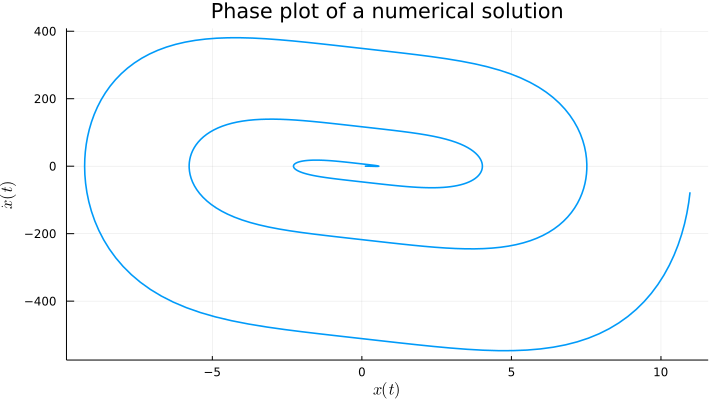

In [81]:
# 結果を可視化する
using Plots
ind = floor(Int, length(sol)/2)
plot(sol[1, ind:end], sol[2, ind:end], 
    xlabel = "\$x(t)\$", 
    ylabel = "\$\\dot{x}\\, (t)\$", 
    line = 1.6, 
    title = "Phase plot of a numerical solution", 
    size = (720, 400), 
    legend = false, 
)

# 問2

In [21]:
# 与えられた方程式を定義する
using DifferentialEquations

function duffing(du, u, h, p, t)
    α, β, δ, γ = p
    hist = h(p, t)[1]; x = u[1]; y = u[2];
    du[1] = y
    du[2] = γ * cos(ω * t) - 1 * (δ * y + α * x + β * x^3)
end

# 遅延がないためいらない
# h(p, t) = [0.1; 1.0]

duffing (generic function with 2 methods)

In [34]:
# パラメータの設定
α = 0.1; β = 50.0; δ = 10.0; γ = -1.0
p = (α, β, δ, γ)
ω = 2.0
tspan = (0.0, 10.0)
u0 = [25.0, 1.0]

prob = DDEProblem(duffing, u0, h, tspan, p)

DDEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 25.0
  1.0

In [35]:
# 解を求める
alg = MethodOfSteps(Tsit5())
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1162-element Vector{Float64}:
  0.0
  2.7744018411999975e-6
  1.6571631124120007e-5
  4.780413509494406e-5
  9.408189751259168e-5
  0.0001531242422632943
  0.00022851138928788923
  0.0003194697669724713
  0.0004271588483603841
  0.0005509599664154555
  0.0006907531804095884
  0.000845732567356238
  0.0010151851899004671
  ⋮
  9.67211942053609
  9.70252009143984
  9.732924051316502
  9.763352797143375
  9.7938281847918
  9.824372760040339
  9.855010152245981
  9.885765490847179
  9.916665936250226
  9.947741274574252
  9.979024730258839
 10.0
u: 1162-element Vector{Vector{Float64}}:
 [25.0, 1.0]
 [24.99999976761755, -1.1675089251417496]
 [24.999909302831455, -11.945695166155147]
 [24.999155275115406, -36.33747435996901]
 [24.996637752749017, -72.45844205087462]
 [24.99100026198149, -118.49615469250936]
 [24.97985436717078, -177.18084058606686]
 [24.960524860825913, -247.79976007874382]
 [24.929352085751283, -3

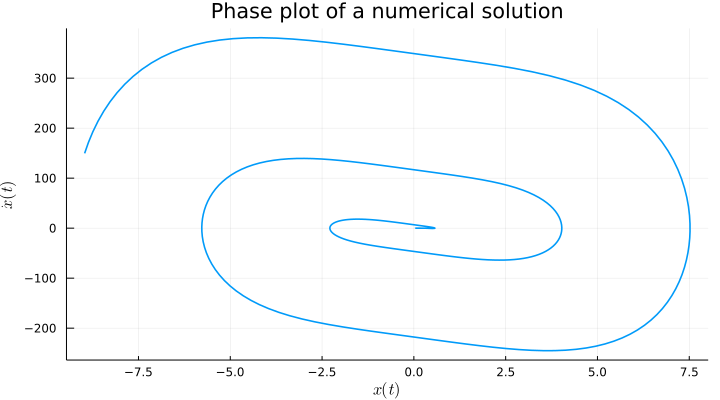

In [36]:
# 結果を可視化する
using Plots
ind = floor(Int, length(sol)/2)
plot(sol[1, ind:end], sol[2, ind:end], 
    xlabel = "\$x(t)\$", 
    ylabel = "\$\\dot{x}\\, (t)\$", 
    line = 1.6, 
    title = "Phase plot of a numerical solution", 
    size = (720, 400), 
    legend = false, 
)